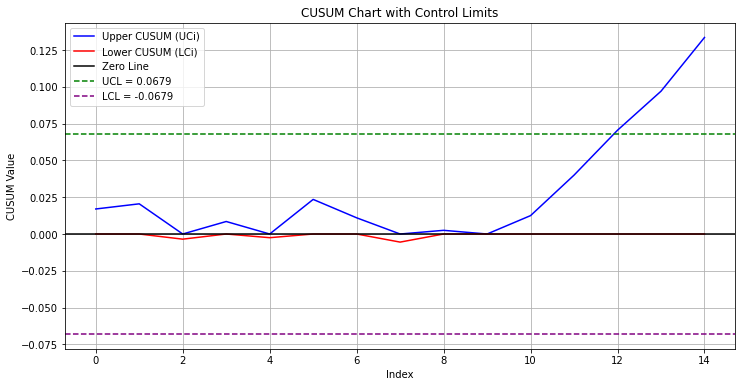

,Werte,Unterschiede,UCi,LCi,UCL,LCL
0,0.235,NaN,0.0170,0.0000,0.0679,-0.0679
1,0.222,0.013,0.0205,0.0000,0.0679,-0.0679
2,0.198,0.024,0.0000,-0.0035,0.0679,-0.0679
3,0.227,0.029,0.0085,0.0000,0.0679,-0.0679
4,0.199,0.028,0.0000,-0.0025,0.0679,-0.0679
5,0.242,0.043,0.0235,0.0000,0.0679,-0.0679
6,0.206,0.036,0.0110,0.0000,0.0679,-0.0679
7,0.196,0.010,0.0000,-0.0055,0.0679,-0.0679
8,0.221,0.025,0.0025,0.0000,0.0679,-0.0679
9,0.212,0.009,0.0000,0.0000,0.0679,-0.0679


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.array([0.235, 0.222, 0.198, 0.227, 0.199, 0.242, 0.206, 0.196, 0.221, 0.212, 0.231, 0.246, 0.249, 0.245, 0.255])
df = pd.DataFrame(data, columns=["Werte"])
df['Unterschiede'] = df['Werte'].diff().abs()
df['Unterschiede'].iloc[0] = np.nan

# Durchschnitt der Unterschiede berechnen
d_u = df['Unterschiede'].mean()
d_u = round(d_u, 5)

# Sigma berechnen
sig = round(d_u / 1.128, 5)

# k, UCL und LCL berechnen
k = round(0.5 * sig, 5)
UCL = round(4 * sig, 4)
LCL = round((4 * sig) * -1, 4)
target = 0.21

df['UCi'] = 0
df['LCi'] = 0
df['UCL'] = UCL
df['LCL'] = LCL

df.loc[0, 'UCi'] = round(max(0, df.loc[0, 'Werte'] - target - k), 3)
df.loc[0, 'LCi'] = round(min(0, df.loc[0, 'Werte'] - target + k), 3)

# CUSUM-Werte berechnen
for i in range(1, len(df)):
    df.loc[i, 'UCi'] = round(max(0, df.loc[i-1, 'UCi'] + df.loc[i, 'Werte'] - target - k), 4)
    df.loc[i, 'LCi'] = round(min(0, df.loc[i-1, 'LCi'] + df.loc[i, 'Werte'] - target + k), 4)




plt.figure(figsize=(12, 6))
plt.plot(df.index, df['UCi'], label='Upper CUSUM (UCi)', color='blue')
plt.plot(df.index, df['LCi'], label='Lower CUSUM (LCi)', color='red')
plt.axhline(y=0, color='black', linestyle='-', label='Zero Line')
plt.axhline(y=UCL, color='green', linestyle='--', label=f'UCL = {UCL:.4f}')
plt.axhline(y=LCL, color='purple', linestyle='--', label=f'LCL = {LCL:.4f}')
plt.xlabel('Index')
plt.ylabel('CUSUM Value')
plt.title('CUSUM Chart with Control Limits')
plt.legend()
plt.grid(True)

plt.savefig("cusum_plot.jpeg", format='jpeg')

plt.show()

df